# Modeling and Predicting

## 1. Importing the clean data and preparing for the model

In [39]:
import pandas as pd
import seaborn as sns
import numpy as np

from sklearn.linear_model import LinearRegression as LinReg
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split as tts
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [40]:
%matplotlib inline
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,10.)})
sns.set_style("whitegrid")

In [41]:
train = pd.read_csv("Data/train_clean.csv")
train.head()

,id,carat,cut,color,clarity,depth,table,price
0,0,1.14,2,4,3,61.0,56.0,9013
1,1,0.76,2,5,5,62.7,57.0,2692
2,2,0.84,2,4,4,61.4,56.0,4372
3,3,1.55,2,5,4,62.0,57.0,13665
4,4,0.30,2,4,7,61.9,57.0,422


In [42]:
test = pd.read_csv("Data/test_clean.csv")
test.head()

,id,carat,cut,color,clarity,depth,table
0,0,1.00,5,7,7,56.3,64.0
1,1,0.83,1,4,6,62.3,58.0
2,2,1.00,5,2,7,67.0,53.0
3,3,1.00,5,5,7,66.5,62.0
4,4,1.20,3,6,6,62.6,57.0


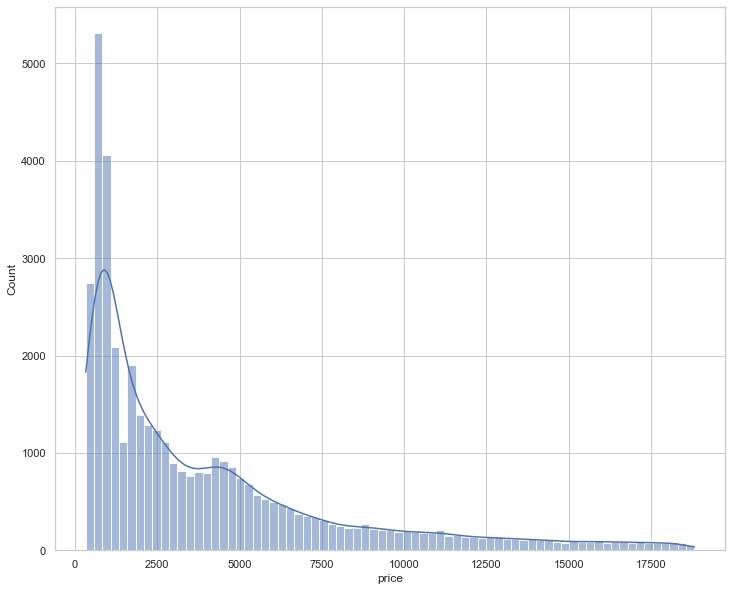

In [43]:
fig = sns.histplot(x=train.price, kde=True)

In [44]:
X = train.drop(columns='price')

In [45]:
y = train.price

In [46]:
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2)

In [47]:
X_train.shape

(32364, 7)

In [48]:
y_train.shape

(32364,)

In [49]:
X_test.shape

(8091, 7)

In [50]:
y_test.shape

(8091,)

## 2. Selecting our model

We chose several models to compare and select the optimal one.

In [51]:
models={
    'Lin': LinReg(),
    'Tree': DecisionTreeRegressor(),
    'Kneighbors': KNeighborsRegressor(),
    'Grad': GradientBoostingRegressor(),
    'Forest': RandomForestRegressor(),
}

In [52]:
for name, model in models.items():
    print("ENTRENANDO: ", name)
    model.fit(X_train, y_train)

ENTRENANDO:  Lin
ENTRENANDO:  Tree
ENTRENANDO:  Kneighbors
ENTRENANDO:  Grad
ENTRENANDO:  Forest


In [53]:
for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"------{name}------")
    print('RMSE - ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print('R2 - ', metrics.r2_score(y_test, y_pred))

------Lin------
RMSE -  1235.955436129154
R2 -  0.9067847885070499
------Tree------
RMSE -  746.045958614049
R2 -  0.9660365085451728
------Kneighbors------
RMSE -  4317.90248169396
R2 -  -0.1376975547714141
------Grad------
RMSE -  630.1342188434202
R2 -  0.9757703414701959
------Forest------
RMSE -  553.2393950888571
R2 -  0.9813229895914709


We choose model RandomForestRegressor()

## 3. Random Forest Model

In [54]:
forest = RandomForestRegressor()
forest.fit(X_train, y_train)

RandomForestRegressor()

In [55]:
y_pred = forest.predict(X_test)

We are going to use GrindSearchCV to optimize the parameters of the model

In [56]:
parameters = {'bootstrap': [True, False],
              'max_depth': [10, 100],
              'max_features': ['auto', 'sqrt'],
              'min_samples_leaf': [1, 2, 3],
              'min_samples_split': [2, 5, 10]}

In [30]:
grid = GridSearchCV(forest, parameters, verbose=1)

In [31]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False], 'max_depth': [10, 100],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 5, 10]},
             verbose=1)

In [32]:
print(grid.best_params_)

{'bootstrap': True, 'max_depth': 100, 'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 5}


In [57]:
forestt = RandomForestRegressor(max_features = "auto", min_samples_leaf = 3, min_samples_split = 5, max_depth=100, bootstrap=True)

In [58]:
forestt.fit(X_train, y_train)

RandomForestRegressor(max_depth=100, min_samples_leaf=3, min_samples_split=5)

In [59]:
y_pred = forestt.predict(X_test)

In [60]:
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE:  545.8465973263235


In [61]:
model = forest.fit(X,y)

In [62]:
price = model.predict(test)

In [63]:
test['price'] = price

In [64]:
test.head()

,id,carat,cut,color,clarity,depth,table,price
0,0,1.00,5,7,7,56.3,64.0,3316.99
1,1,0.83,1,4,6,62.3,58.0,2968.04
2,2,1.00,5,2,7,67.0,53.0,3539.61
3,3,1.00,5,5,7,66.5,62.0,3058.11
4,4,1.20,3,6,6,62.6,57.0,4957.19


In [65]:
Pricesf = test.drop(['carat', 'cut', 'color', 'clarity', 'depth', 'table'], axis=1)

In [66]:
Pricesf.head()

,id,price
0,0,3316.99
1,1,2968.04
2,2,3539.61
3,3,3058.11
4,4,4957.19


In [67]:
Pricesf.to_csv("Data/submission2_Jpda.csv",index=False)